# Image Processing Assignment 3

Bereket Kebede, Grad student <br>
University of Memphis, Spring 2022 <br>
Instructor: Dr. Yeasin <br>

## Getting started
----

#### Contents: 
A) Display basis functions of 2-D discrete Fourier Transform Kernel <br>
B) Show the importance of Phase and Amplitude of a 2-D signal <br>
C) Show the effect of Gibbs phenomenon on an image. <br>
D) Show the effect of frequency resolution. <br>
E) Show the differences between DFT and DCT in compressing linear signal. <br>

In [12]:
##################################################
# Import necessary libraries

import sys
sys.path.append("C:/Users/CIRL/AppData/Local\Programs/Python/Python39/Lib/site-packages")
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy

from matplotlib import cm
from itertools import product
from tqdm import tqdm

In [46]:
##################################################
# Defining functions 


# u,v - frequency domain 
# x,y - real space domain
def basis_function(img, u=0, v=0):
    X, Y = img.shape
    f_img = np.zeros((X,Y), dtype=complex)
    for x in range(X):
        for y in range(Y):
            f_uv = np.exp(2j * np.pi * (u*x + v*y))
            f_img[x,y] = f_uv
    ret, bw_img = cv2.threshold(f_img.imag,f_img.imag.mean(),f_img.imag.max(), cv2.THRESH_BINARY)
    return bw_img

# discrete fast fourier transform (dfft) using numpy
# returns the fourier tranform of a 2d image give an input image in spatial domain
def dfft_numpy(img):
    new_image = np.fft.fftshift(np.fft.fft2(img))
    return new_image

def idfft_numpy(img):
    new_image = np.fft.ifft2(np.fft.ifftshift(img))
    return new_image


def dfft(img):
    X, Y = img.shape
    f_img = np.zeros((X,Y), dtype=complex)
    x = np.arange(X)
    y = np.arange(Y)
    for m in range(X):
        e = np.exp(2j * np.pi * (m*x/X))
        dot_mn = np.dot(e, img)
        f_img[m] = dot_mn
        
    f_img = (1 / np.sqrt(Y)) * f_img
    for n in range(Y):
        e = np.exp(2j * np.pi * (n*y/Y))
        dot_mn = np.dot(f_img, e)
        f_img[:,n] = (1/np.sqrt(X)) * dot_mn
    mag = np.sqrt(f_img.imag ** 2 + f_img.real ** 2)
    phase = np.arctan2(f_img.imag, f_img.real)
    return f_img, mag, phase



def idfft(img):
    X, Y = img.shape
    f_img = np.zeros((X,Y), dtype=complex)
    x = np.arange(X)
    y = np.arange(Y)
    for m in range(X):
        e = np.exp(-2j * np.pi * (m*x/X))
        dot_mn = np.dot(e, img)
        f_img[m] = dot_mn
        
    f_img = (1 / np.sqrt(Y)) * f_img
    for n in range(Y):
        e = np.exp(-2j * np.pi * (n*y/Y))
        dot_mn = np.dot(f_img, e)
        f_img[:,n] = (1/np.sqrt(X)) * dot_mn
    mag = np.sqrt(f_img.imag ** 2 + f_img.real ** 2)
    phase = np.arctan2(f_img.imag, f_img.real)
    return f_img, mag, phase

def scale_img(img, qmin=0, qmax=255):
    max_val = img.max()
    min_val = img.min()
    scaled_img = ((img - min_val)/(max_val - min_val)) * (qmax - qmin)
    
    return scaled_img.astype(np.uint8)
# def dfft(img)

## A) Display basis functions of 2-D discrete Fourier Transform Kernel.

Logic: DFT (Discrete Fourier Transform) is based on complex orthonormal basis vectors. <br>

![ex](Images/2D_basis_vectors.PNG)

Ref: Lecture Note, page 23.

In [10]:
img_a = np.zeros((100, 100))
uv_values = list(product([-2,-1,0,1,2], repeat=2))
uv_values

[(-2, -2),
 (-2, -1),
 (-2, 0),
 (-2, 1),
 (-2, 2),
 (-1, -2),
 (-1, -1),
 (-1, 0),
 (-1, 1),
 (-1, 2),
 (0, -2),
 (0, -1),
 (0, 0),
 (0, 1),
 (0, 2),
 (1, -2),
 (1, -1),
 (1, 0),
 (1, 1),
 (1, 2),
 (2, -2),
 (2, -1),
 (2, 0),
 (2, 1),
 (2, 2)]

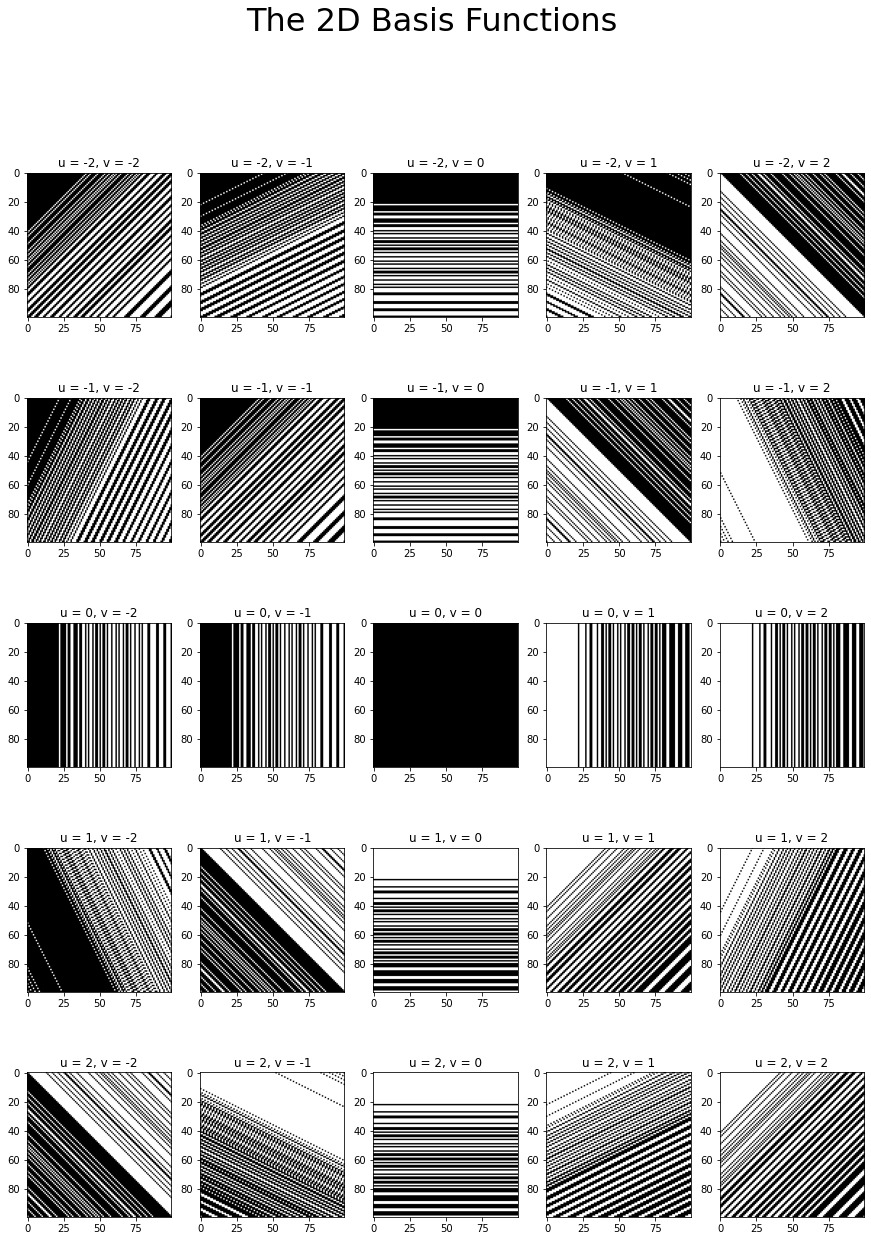

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15,20))

plt.suptitle('The 2D Basis Functions', fontsize=32)

for ax, uv in zip(axes.flatten(), uv_values):
    u, v = uv
    ax.set_title('u = %d, v = %d' % (uv[0], uv[1]) )
    ax.imshow(basis_function(img_a, u, v), cmap=cm.gray)

## B) Show the importance of Phase and Amplitude of a 2-D signal

![ex](Images/Significance_of_Phase.PNG)

Logic: Phase contain more information about the imaage compared to the amplitude. There are different combination of numbers that can result in similar amplitude.

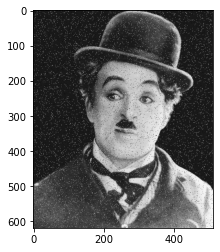

In [22]:
##################################################
# Import an arbitrary image 

img_b = cv2.imread('Data/Chaplin.png', cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img_b, cmap='gray')

Text(0.5, 1.0, 'FFT')

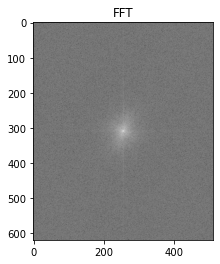

In [23]:
Fourier_img = dfft_numpy(img_b)
plt.imshow(np.log(abs(Fourier_img)), cmap ='gray')
plt.title('FFT')

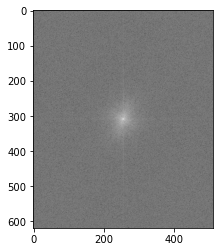

In [74]:
amplitude = np.abs(Fourier_img)
plt.imshow(10*np.log(abs(amplitude)), cmap ='gray')

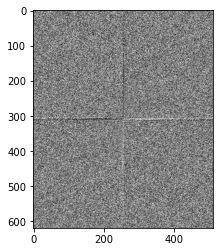

In [31]:
phase = np.angle(Fourier_img)
plt.imshow(phase, cmap ='gray')

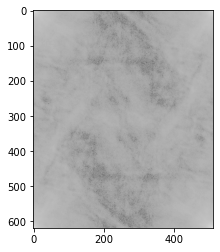

In [64]:
inverse_using_amplitude = idfft_numpy(amplitude)
plt.imshow(10*np.log10(np.abs(inverse_using_amplitude)), cmap ='gray')

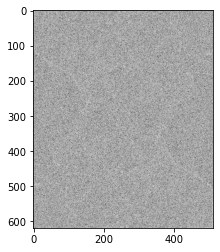

In [65]:
inverse_using_phase = idfft_numpy(phase)
plt.imshow(10*np.log10(np.abs(inverse_using_phase)), cmap ='gray')

Text(0.5, 1.0, 'Reconstructing using Phase')

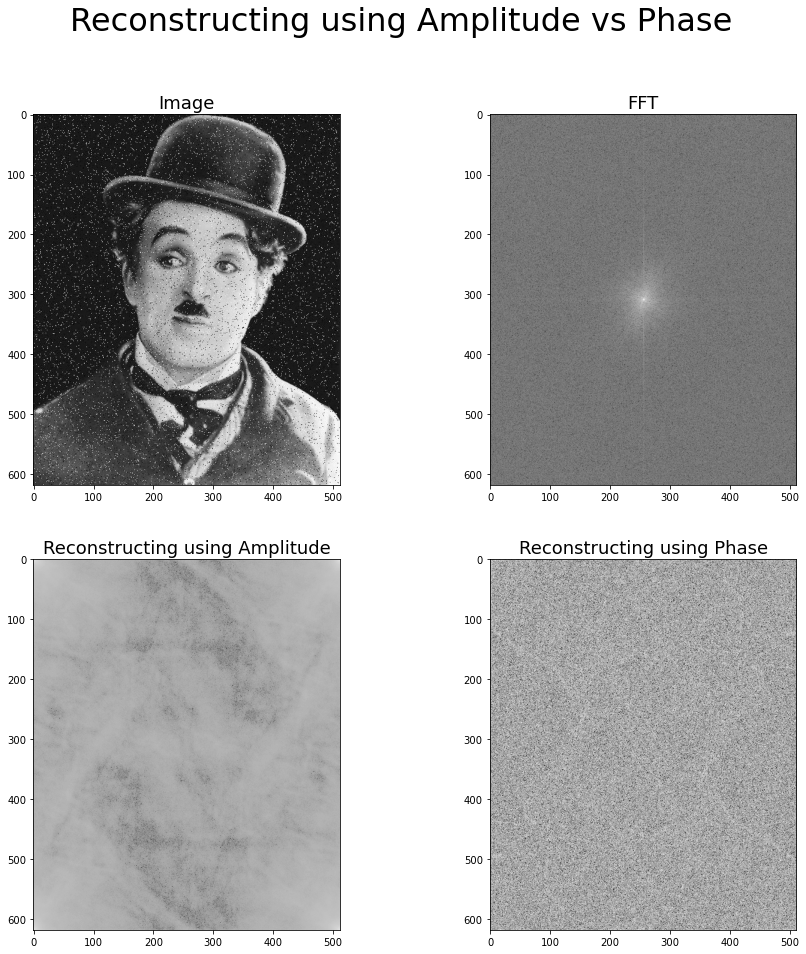

In [109]:
imgs = [img_b, np.log(abs(Fourier_img)), np.log(abs(inverse_using_amplitude)), np.log(abs(inverse_using_phase)) ]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))



plt.suptitle ('Reconstructing using Amplitude vs Phase', fontsize=32)
for ax, img in zip(axs.flatten(), imgs):
    ax.imshow(img, cmap=cm.gray)
    
axs[0,0].set_title('Image', fontsize=18)
axs[0,1].set_title('FFT', fontsize=18)
axs[1,0].set_title('Reconstructing using Amplitude', fontsize=18)
axs[1,1].set_title('Reconstructing using Phase', fontsize=18)

## C) Show the effect of Gibbs phenomenon on an image.

In [23]:
def gibbs(img, D):
    X, Y = img.shape
    f_img = np.fft.fft2(img)
    f_img = np.fft.fftshift(f_img)
    f = np.zeros((X,Y), dtype=np.complex)
    c_x, c_y = X/2, Y/2
    for u in range(X):
        for v in range(Y):
            d_uv = np.sqrt((u - c_x) ** 2 + (v - c_y) ** 2)
            if d_uv <= D:
                f[u,v] = f_img[u,v]
            else:
                f[u,v] = 0
                
    final = np.fft.ifft2(f)
    
    return np.absolute(final)

(129, 192)


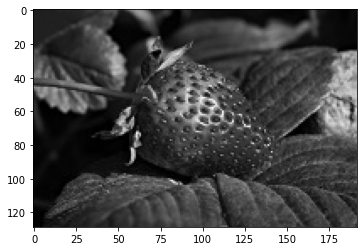

In [24]:
img_c = cv2.imread('Data/straw_2.jpg', cv2.IMREAD_GRAYSCALE)
print(img_c.shape)
plt.imshow(img_c, cmap=cm.gray)
plt.show()

C:\Users\CIRL\AppData\Local\Temp/ipykernel_1948/2671240079.py:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.zeros((X,Y), dtype=np.complex)


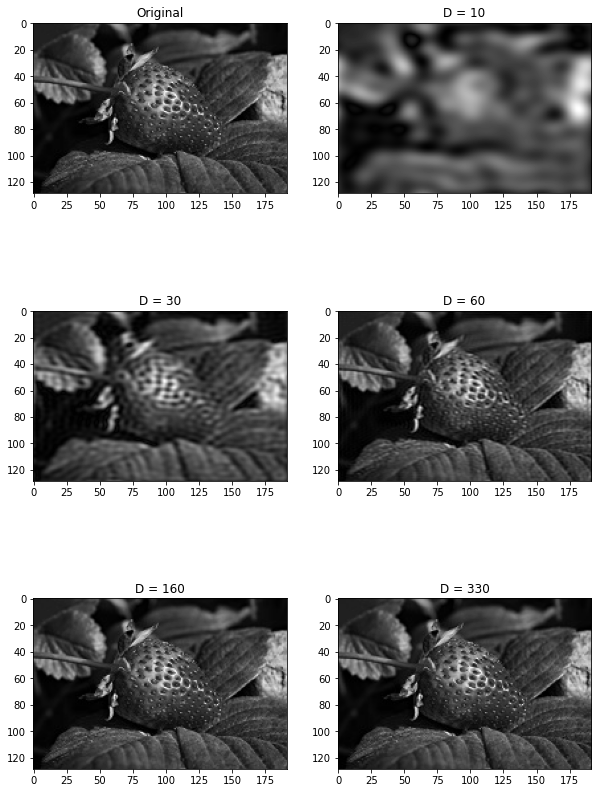

In [26]:
Ds = [10,30,60,160, 330]
imgs = [img_c]
for D in Ds:
    imgs.append(gibbs(img_c, D))
    
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

axes.flatten()[0].set_title('Original')
for ax, img in zip(axes.flatten(), imgs):
    ax.imshow(img, cmap=cm.gray)
    
for i in range(1, 6):
    axes.flatten()[i].set_title('D = {}'.format(Ds[i-1]))

## D, E) Show the differences between DFT (Discrete Fourier Transform) and DCT (Discrete Cosine Transform) in compressing linear signal

Major difference is that DCT is purely real while taking a DFT of a signal can give you complex signal. The basis for both are them are different. To analyse the frequency content of the signal, we use DFT. DCT is more of used in compression [5]. The difference between the two is the type of basis function used by each transform; the DFT uses a set of harmonically-related complex exponential functions, while the DCT uses only (real-valued) cosine functions [6]. <br> 

Discrete cosine transform has roughly the same frequency range as that of the Fourier and Hartley transforms, but twice the frequency resolution.<br><br>

**DFT Transform**

$f(x,y)$ <=> $R(u,v)$ odd; $I(u,v)$ even 


x, y, u, and v are discrete (integer) variables, with x and u in the range [0,M − 1], and y and v in the range [0,N − 1]. <br>

x, y : spatial domain <br>
u, v : frequency domain  <br>

<br><br>

In [49]:
from scipy.fftpack import fft, dct, dctn

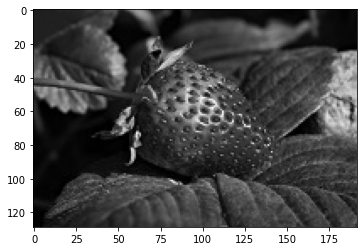

In [4]:
img_e = cv2.imread('Data/straw_2.jpg', cv2.IMREAD_GRAYSCALE)
plt.figure()
plt.imshow(img_e, cmap='gray')

In [36]:
DFT_transform = scipy.fft.fft2(img_e)
DCT_transform = dctn(img_e)

(129, 192)
[[1465602.             -0.j          -64465.6017381  +97096.32458198j
    79126.93391367 +82886.18524296j ...  -17182.92029504 -81965.96873541j
    79126.93391367 -82886.18524296j  -64465.6017381  -97096.32458198j]
 [-129150.87775293-141862.59950553j  -75903.34885459-103426.88034042j
  -159182.33623411-110519.96261356j ...   10687.72973472 +75595.30054516j
  -106774.26692871 -13211.56108148j   10736.55714992  +5785.92141824j]
 [  -4665.10996115+189965.76531403j   21256.43599978 +34407.09860701j
    16276.02096851 +66617.28927311j ...   -2328.05565297 -27882.87492978j
    40662.3270889  +69948.31430778j  -79945.93248576  -2416.48527841j]
 ...
 [ -66990.04591419 -30529.29627574j   56243.01228258  +3144.9751836j
    72243.87847503  +6953.08603977j ...  -14178.56133437 -23592.61003113j
   -14969.31264503 -18223.67977378j   55953.52180637 +22173.97869546j]
 [  -4665.10996115-189965.76531403j  -79945.93248576  +2416.48527841j
    40662.3270889  -69948.31430778j ...  -21560.5202532

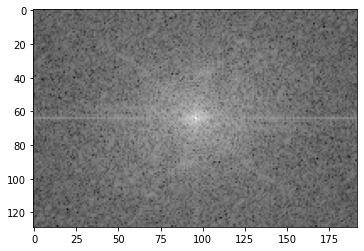

In [38]:
print(DFT_transform.shape)
print(DFT_transform)
plt.imshow(abs(np.log(np.fft.fftshift(DFT_transform))), cmap ='gray')

(129, 192)
[[ 5.86240800e+06 -7.11094885e+05 -2.51473233e+05 ... -2.88631067e+03
  -1.32648876e+03  2.92842994e+03]
 [ 1.38910912e+05  2.25342640e+05  1.65755819e+05 ... -7.35225046e+02
  -4.35576190e+02 -1.42483696e+03]
 [-5.30268321e+05  3.73867883e+05 -1.38535895e+05 ...  4.18524715e+03
   4.78724337e+03 -1.16936068e+03]
 ...
 [-4.38807876e+03 -5.59174457e+02  1.75461560e+03 ...  1.04306555e+03
   1.14862626e+03  1.03183305e+02]
 [-3.94416575e+03  6.73933541e+03  2.54168957e+03 ... -2.06634940e+03
  -3.40687756e+03  5.48507538e+03]
 [ 4.15094576e+03 -2.06595570e+03  7.01303996e+03 ... -4.73131647e+03
   1.11965556e+03  3.68863409e+02]]


C:\Users\CIRL\AppData\Local\Temp/ipykernel_17196/3383737808.py:3: RuntimeWarning: invalid value encountered in log
  plt.imshow(np.log(np.fft.fftshift(DCT_transform)), cmap ='gray')


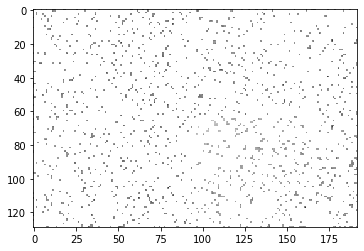

In [51]:
print(DCT_transform.shape)
print(DCT_transform)
plt.imshow(np.log(np.fft.fftshift(DCT_transform)), cmap ='gray')

Reference

[1] 2D Fourier transform in numpy: https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html <br>
[2] Real part of a complex number numpy: https://numpy.org/doc/stable/reference/generated/numpy.real.html <br>
[3] framework: https://github.com/kmnuddin/image_processing_EECE_7241/blob/master/HW_3/ <br>
[4] http://www.add.ece.ufl.edu/4511/references/ImprovingFFTResoltuion.pdf <br>
[5] https://www.quora.com/What-are-the-differences-and-similarities-between-the-DFT-and-the-cosine-transform#:~:text=Major%20difference%20is%20that%20DCT,more%20of%20used%20in%20compression. <br>
[6] https://dsp.stackexchange.com/questions/13/what-is-the-difference-between-a-fourier-transform-and-a-cosine-transform <br>
[7] Fourier Transform Scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fft2.html <br>
[8] Frequency resolution: https://www.oreilly.com/library/view/elegant-scipy/9781491922927/ch04.html <br>
[9] Display images in notebook: https://stackoverflow.com/questions/11854847/how-can-i-display-an-image-from-a-file-in-jupyter-notebook <br>
[10] Fourier transform from scratch: https://medium.datadriveninvestor.com/fourier-transform-for-image-processing-in-python-from-scratch-b96f68a6c30d  <br>
[11] Numpy Inverse Fourier Transform: https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html <br>